In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import missingno as msno

from fancyimpute import MICE 
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

C:\Users\oussa\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
path='C:\\Users\\oussa\\Downloads\\Data Science\\Master Statistique Big Data Dauphine\\Module 3\\Engie Challenge Data ENS\\'

train_output=pd.read_csv(path+'challenge_output_data_training_file_help_engie_improve_wind_power_production.csv',sep=';')

In [3]:
train_output.head()

,ID,TARGET
0,1,-0.703
1,2,-0.747
2,3,-0.791
3,4,-0.736
4,5,-1.055


In [40]:
data_train=pd.read_csv(path+'input_training.csv',sep=';')
        
    
data_train=pd.merge(data_train,train_output,left_on='ID',right_on='ID',how='inner')

In [5]:
data_train.head(50)

,ID,MAC_CODE,Date_time,Pitch_angle,Pitch_angle_min,Pitch_angle_max,Pitch_angle_std,Hub_temperature,Hub_temperature_min,Hub_temperature_max,...,Rotor_speed_min,Rotor_speed_max,Rotor_speed_std,Rotor_bearing_temperature,Rotor_bearing_temperature_min,Rotor_bearing_temperature_max,Rotor_bearing_temperature_std,Absolute_wind_direction_c,Nacelle_angle_c,TARGET
0,1,WT3,1.0,92.470001,92.470001,92.470001,0.0,7.00,7.00,7.00,...,0.0,0.00,0.00,2.40,2.40,2.40,0.00,294.190000,294.239990,-0.703
1,2,WT3,2.0,92.470001,92.470001,92.470001,0.0,7.00,7.00,7.00,...,0.0,0.00,0.00,2.40,2.40,2.40,0.00,297.829990,294.239990,-0.747
2,3,WT3,3.0,92.470001,92.470001,92.470001,0.0,7.00,7.00,7.00,...,0.0,0.00,0.00,2.40,2.40,2.40,0.00,322.209990,294.239990,-0.791
3,4,WT3,4.0,92.470001,92.470001,92.470001,0.0,6.97,6.70,7.00,...,0.0,0.00,0.00,2.40,2.40,2.40,0.00,318.690000,294.239990,-0.736
4,5,WT3,5.0,92.470001,92.470001,92.470001,0.0,6.93,6.00,7.00,...,0.0,0.00,0.00,2.40,2.40,2.50,0.00,314.890010,294.239990,-1.055
5,6,WT3,6.0,92.470001,92.470001,92.470001,0.0,6.32,6.00,7.00,...,0.0,0.00,0.00,2.40,2.40,2.40,0.00,301.709990,294.239990,-0.373
6,7,WT3,7.0,92.470001,92.470001,92.470001,0.0,6.00,6.00,6.83,...,0.0,0.00,0.00,2.40,2.40,2.40,0.00,303.980010,294.239990,0.100
7,8,WT3,8.0,92.470001,92.470001,92.470001,0.0,5.95,5.76,6.00,...,0.0,0.00,0.00,2.40,2.40,2.40,0.00,303.780000,294.239990,0.100
8,9,WT3,9.0,92.470001,92.470001,92.470001,0.0,5.04,5.00,6.00,...,0.0,0.00,0.00,2.40,2.40,2.40,0.00,290.920010,294.239990,0.100
9,10,WT3,10.0,92.470001,92.470001,92.470001,0.0,4.11,4.00,5.00,...,0.0,0.00,0.00,2.40,2.35,2.40,0.00,287.420010,294.239990,0.100


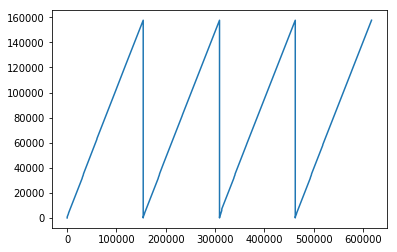

In [6]:
plt.plot(data_train.Date_time)


In [41]:
data_train.shape

(617386, 79)

In [9]:
list(data_train)

['ID',
 'MAC_CODE',
 'Date_time',
 'Pitch_angle',
 'Pitch_angle_min',
 'Pitch_angle_max',
 'Pitch_angle_std',
 'Hub_temperature',
 'Hub_temperature_min',
 'Hub_temperature_max',
 'Hub_temperature_std',
 'Generator_converter_speed',
 'Generator_converter_speed_min',
 'Generator_converter_speed_max',
 'Generator_converter_speed_std',
 'Generator_speed',
 'Generator_speed_min',
 'Generator_speed_max',
 'Generator_speed_std',
 'Generator_bearing_1_temperature',
 'Generator_bearing_1_temperature_min',
 'Generator_bearing_1_temperature_max',
 'Generator_bearing_1_temperature_std',
 'Generator_bearing_2_temperature',
 'Generator_bearing_2_temperature_min',
 'Generator_bearing_2_temperature_max',
 'Generator_bearing_2_temperature_std',
 'Generator_stator_temperature',
 'Generator_stator_temperature_min',
 'Generator_stator_temperature_max',
 'Generator_stator_temperature_std',
 'Gearbox_bearing_1_temperature',
 'Gearbox_bearing_1_temperature_min',
 'Gearbox_bearing_1_temperature_max',
 'Gearbo

In [10]:
data_train.info()

In [11]:
data_train.isnull().sum()

In [12]:
msno.heatmap(data_train.drop(['ID'],axis=1))

In [13]:


data_train = pd.get_dummies(data_train, columns = ['MAC_CODE'],dummy_na=True)
#data_train=data_train.dropna()
y_train=data_train['TARGET'].values
data_train=data_train.drop(['ID','TARGET'],axis=1)

In [14]:
y_train

array([-7.03000022e-01, -7.46999978e-01, -7.91000000e-01, ...,
        1.22382800e+03,  1.08655900e+03,  1.14292311e+03])

In [19]:
len(y_train)

617386

In [15]:
data_train.shape

(617386, 81)

In [16]:
data_train_imputé=pd.read_csv('data_train_imputed.csv')
data_train_imputé=data_train_imputé.drop(['Unnamed: 0'],axis=1)

In [20]:
data_train_imputé.head()

,Date_time,Pitch_angle,Pitch_angle_min,Pitch_angle_max,Pitch_angle_std,Hub_temperature,Hub_temperature_min,Hub_temperature_max,Hub_temperature_std,Generator_converter_speed,...,Rotor_bearing_temperature_min,Rotor_bearing_temperature_max,Rotor_bearing_temperature_std,Absolute_wind_direction_c,Nacelle_angle_c,MAC_CODE_WT1,MAC_CODE_WT2,MAC_CODE_WT3,MAC_CODE_WT4,MAC_CODE_nan
0,1.0,92.470001,92.470001,92.470001,0.0,7.00,7.0,7.0,0.00,3.38,...,2.4,2.4,0.0,294.19000,294.23999,0.0,0.0,1.0,0.0,0.0
1,2.0,92.470001,92.470001,92.470001,0.0,7.00,7.0,7.0,0.00,3.56,...,2.4,2.4,0.0,297.82999,294.23999,0.0,0.0,1.0,0.0,0.0
2,3.0,92.470001,92.470001,92.470001,0.0,7.00,7.0,7.0,0.00,3.51,...,2.4,2.4,0.0,322.20999,294.23999,0.0,0.0,1.0,0.0,0.0
3,4.0,92.470001,92.470001,92.470001,0.0,6.97,6.7,7.0,0.02,4.06,...,2.4,2.4,0.0,318.69000,294.23999,0.0,0.0,1.0,0.0,0.0
4,5.0,92.470001,92.470001,92.470001,0.0,6.93,6.0,7.0,0.17,3.61,...,2.4,2.5,0.0,314.89001,294.23999,0.0,0.0,1.0,0.0,0.0


In [21]:
X_train=data_train_imputé.values

In [42]:
len(X_train)

617386

In [50]:
#X_train=MICE().complete(data_train.values)

In [51]:
#data_train_imputed=pd.DataFrame(data=X_train,columns=list(data_train))

In [52]:
#data_train_imputed.to_csv('data_train_imputed.csv')

In [53]:
#data_train_imputed.head()

In [54]:
#data_train_imputed.isnull().sum()

In [55]:
#data_train_imputed.shape

In [56]:
#X_train=data_train_imputed.drop(['TARGET'],axis=1).values

In [22]:

modele=GradientBoostingRegressor()    
modele.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [8]:
modele

NameError: name 'modele' is not defined

In [23]:
data_test=pd.read_csv(path+'input_testing.csv',sep=';')
ID_test=data_test['ID'].values

In [24]:
ID_test

array([617387, 617388, 617389, ..., 826216, 826217, 826218], dtype=int64)

In [24]:
data_test.head()

,ID,MAC_CODE,Date_time,Pitch_angle,Pitch_angle_min,Pitch_angle_max,Pitch_angle_std,Hub_temperature,Hub_temperature_min,Hub_temperature_max,...,Rotor_speed,Rotor_speed_min,Rotor_speed_max,Rotor_speed_std,Rotor_bearing_temperature,Rotor_bearing_temperature_min,Rotor_bearing_temperature_max,Rotor_bearing_temperature_std,Absolute_wind_direction_c,Nacelle_angle_c
0,617387,WT3,157681.0,-0.92,-1.04,2.37,0.42,16.0,16.0,16.0,...,17.070000,14.860000,17.379999,0.50,30.680000,30.4,30.700001,0.04,213.24001,214.95
1,617388,WT3,157682.0,-1.00,-1.04,-0.31,0.05,16.0,16.0,16.0,...,17.129999,16.030001,17.540001,0.22,30.570000,30.5,30.700001,0.05,216.56000,213.02
2,617389,WT3,157683.0,-1.00,-1.03,-0.96,0.01,16.0,16.0,16.0,...,16.900000,16.889999,17.430000,0.10,30.520000,30.5,30.700001,0.08,211.42000,213.02
3,617390,WT3,157684.0,-0.99,-1.02,-0.91,0.02,16.0,16.0,16.0,...,16.600000,14.650000,17.379999,0.50,30.690001,30.5,30.700001,0.05,213.42999,213.02
4,617391,WT3,157685.0,-1.00,-1.03,-0.25,0.05,16.0,16.0,16.0,...,16.950001,13.900000,17.400000,0.78,30.870001,30.5,30.799999,0.06,212.09000,213.02


In [ ]:
data_test.isnull().sum()

In [25]:
data_test=data_test.drop(['ID'],axis=1)
#data_train = pd.get_dummies(data_train, columns = ['MAC_CODE'],dummy_na=True,drop_first=True )
data_test = pd.get_dummies(data_test, columns = ['MAC_CODE'],dummy_na=True)

In [26]:
data_test.shape

(208832, 81)

In [25]:
data_test_imputé=pd.read_csv('data_test_imputed.csv')

In [26]:
data_test_imputé=data_test_imputé.drop(['Unnamed: 0'],axis=1)

In [27]:
data_test_imputé.head()

,Date_time,Pitch_angle,Pitch_angle_min,Pitch_angle_max,Pitch_angle_std,Hub_temperature,Hub_temperature_min,Hub_temperature_max,Hub_temperature_std,Generator_converter_speed,...,Rotor_bearing_temperature_min,Rotor_bearing_temperature_max,Rotor_bearing_temperature_std,Absolute_wind_direction_c,Nacelle_angle_c,MAC_CODE_WT1,MAC_CODE_WT2,MAC_CODE_WT3,MAC_CODE_WT4,MAC_CODE_nan
0,157681.0,-0.92,-1.04,2.37,0.42,16.0,16.0,16.0,0.0,1794.1000,...,30.4,30.700001,0.04,213.24001,214.95,0.0,0.0,1.0,0.0,0.0
1,157682.0,-1.00,-1.04,-0.31,0.05,16.0,16.0,16.0,0.0,1800.6801,...,30.5,30.700001,0.05,216.56000,213.02,0.0,0.0,1.0,0.0,0.0
2,157683.0,-1.00,-1.03,-0.96,0.01,16.0,16.0,16.0,0.0,1776.7100,...,30.5,30.700001,0.08,211.42000,213.02,0.0,0.0,1.0,0.0,0.0
3,157684.0,-0.99,-1.02,-0.91,0.02,16.0,16.0,16.0,0.0,1744.6600,...,30.5,30.700001,0.05,213.42999,213.02,0.0,0.0,1.0,0.0,0.0
4,157685.0,-1.00,-1.03,-0.25,0.05,16.0,16.0,16.0,0.0,1781.1600,...,30.5,30.799999,0.06,212.09000,213.02,0.0,0.0,1.0,0.0,0.0


In [67]:
list(data_train_imputed)==list(data_test)

NameError: name 'data_train_imputed' is not defined

In [28]:
#X_test=MICE().complete(data_test.values)

[MICE] Completing matrix with shape (208832, 81)
[MICE] Starting imputation round 1/110, elapsed time 0.615
[MICE] Starting imputation round 2/110, elapsed time 24.441
[MICE] Starting imputation round 3/110, elapsed time 45.280
[MICE] Starting imputation round 4/110, elapsed time 73.303
[MICE] Starting imputation round 5/110, elapsed time 117.340
[MICE] Starting imputation round 6/110, elapsed time 148.072
[MICE] Starting imputation round 7/110, elapsed time 180.120
[MICE] Starting imputation round 8/110, elapsed time 211.698
[MICE] Starting imputation round 9/110, elapsed time 240.586
[MICE] Starting imputation round 10/110, elapsed time 269.318
[MICE] Starting imputation round 11/110, elapsed time 299.454
[MICE] Starting imputation round 12/110, elapsed time 320.491
[MICE] Starting imputation round 13/110, elapsed time 350.912
[MICE] Starting imputation round 14/110, elapsed time 380.537
[MICE] Starting imputation round 15/110, elapsed time 416.885
[MICE] Starting imputation round 16

In [28]:
X_test=data_test_imputé.values


In [74]:
X_train[:,0]

array([1.00000e+00, 2.00000e+00, 3.00000e+00, ..., 1.57678e+05,
       1.57679e+05, 1.57680e+05])

In [73]:
X_test[:,0]

array([157681., 157682., 157683., ..., 210376., 210377., 210378.])

In [29]:
#data_test_imputed=pd.DataFrame(data=X_test,columns=list(data_test))

In [30]:
#data_test_imputed.to_csv('data_test_imputed.csv')

In [80]:
data_test_imputed.head()

,Date_time,Pitch_angle,Pitch_angle_min,Pitch_angle_max,Pitch_angle_std,Hub_temperature,Hub_temperature_min,Hub_temperature_max,Hub_temperature_std,Generator_converter_speed,...,Rotor_bearing_temperature_min,Rotor_bearing_temperature_max,Rotor_bearing_temperature_std,Absolute_wind_direction_c,Nacelle_angle_c,MAC_CODE_WT1,MAC_CODE_WT2,MAC_CODE_WT3,MAC_CODE_WT4,MAC_CODE_nan
0,157681.0,-0.92,-1.04,2.37,0.42,16.0,16.0,16.0,0.0,1794.1000,...,30.4,30.700001,0.04,213.24001,214.95,0.0,0.0,1.0,0.0,0.0
1,157682.0,-1.00,-1.04,-0.31,0.05,16.0,16.0,16.0,0.0,1800.6801,...,30.5,30.700001,0.05,216.56000,213.02,0.0,0.0,1.0,0.0,0.0
2,157683.0,-1.00,-1.03,-0.96,0.01,16.0,16.0,16.0,0.0,1776.7100,...,30.5,30.700001,0.08,211.42000,213.02,0.0,0.0,1.0,0.0,0.0
3,157684.0,-0.99,-1.02,-0.91,0.02,16.0,16.0,16.0,0.0,1744.6600,...,30.5,30.700001,0.05,213.42999,213.02,0.0,0.0,1.0,0.0,0.0
4,157685.0,-1.00,-1.03,-0.25,0.05,16.0,16.0,16.0,0.0,1781.1600,...,30.5,30.799999,0.06,212.09000,213.02,0.0,0.0,1.0,0.0,0.0


In [90]:
#data_train_imputed.head()

In [29]:
y_test=modele.predict(X_test)
y_test

array([1245.78342187, 1275.36370237, 1005.43740532, ..., 1170.79118864,
       1090.20569716, 1281.67899391])

In [30]:
prediction=pd.DataFrame({'ID':ID_test,'TARGET':y_test})

In [31]:
prediction.head(50)

,ID,TARGET
0,617387,1245.783422
1,617388,1275.363702
2,617389,1005.437405
3,617390,986.820752
4,617391,1085.119820
5,617392,1014.157672
6,617393,1104.911741
7,617394,1088.641785
8,617395,1179.148099
9,617396,1292.477425


In [34]:
prediction.to_csv('prediction_Engie_Gradient_Boosting_no_dropna.csv',sep=';',index=False,columns=['ID','TARGET'])

In [35]:
test_output=pd.read_csv('prediction_Engie_Gradient_Boosting_no_dropna.csv',sep=';')

In [37]:
train_output.TARGET.describe()

count    617386.000000
mean        372.752158
std         468.001341
min         -19.479999
25%          18.624000
50%         193.985989
75%         540.684000
max        2256.057110
Name: TARGET, dtype: float64

In [36]:
test_output.TARGET.describe()

count    208832.000000
mean        431.137988
std         482.390999
min         -77.157522
25%          71.417632
50%         255.844992
75%         636.113684
max        2266.640510
Name: TARGET, dtype: float64

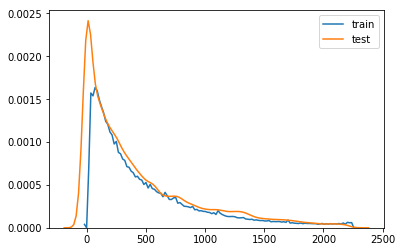

In [38]:

sns.kdeplot(y_train, bw=.2, label="train")
sns.kdeplot(y_test,label='test')

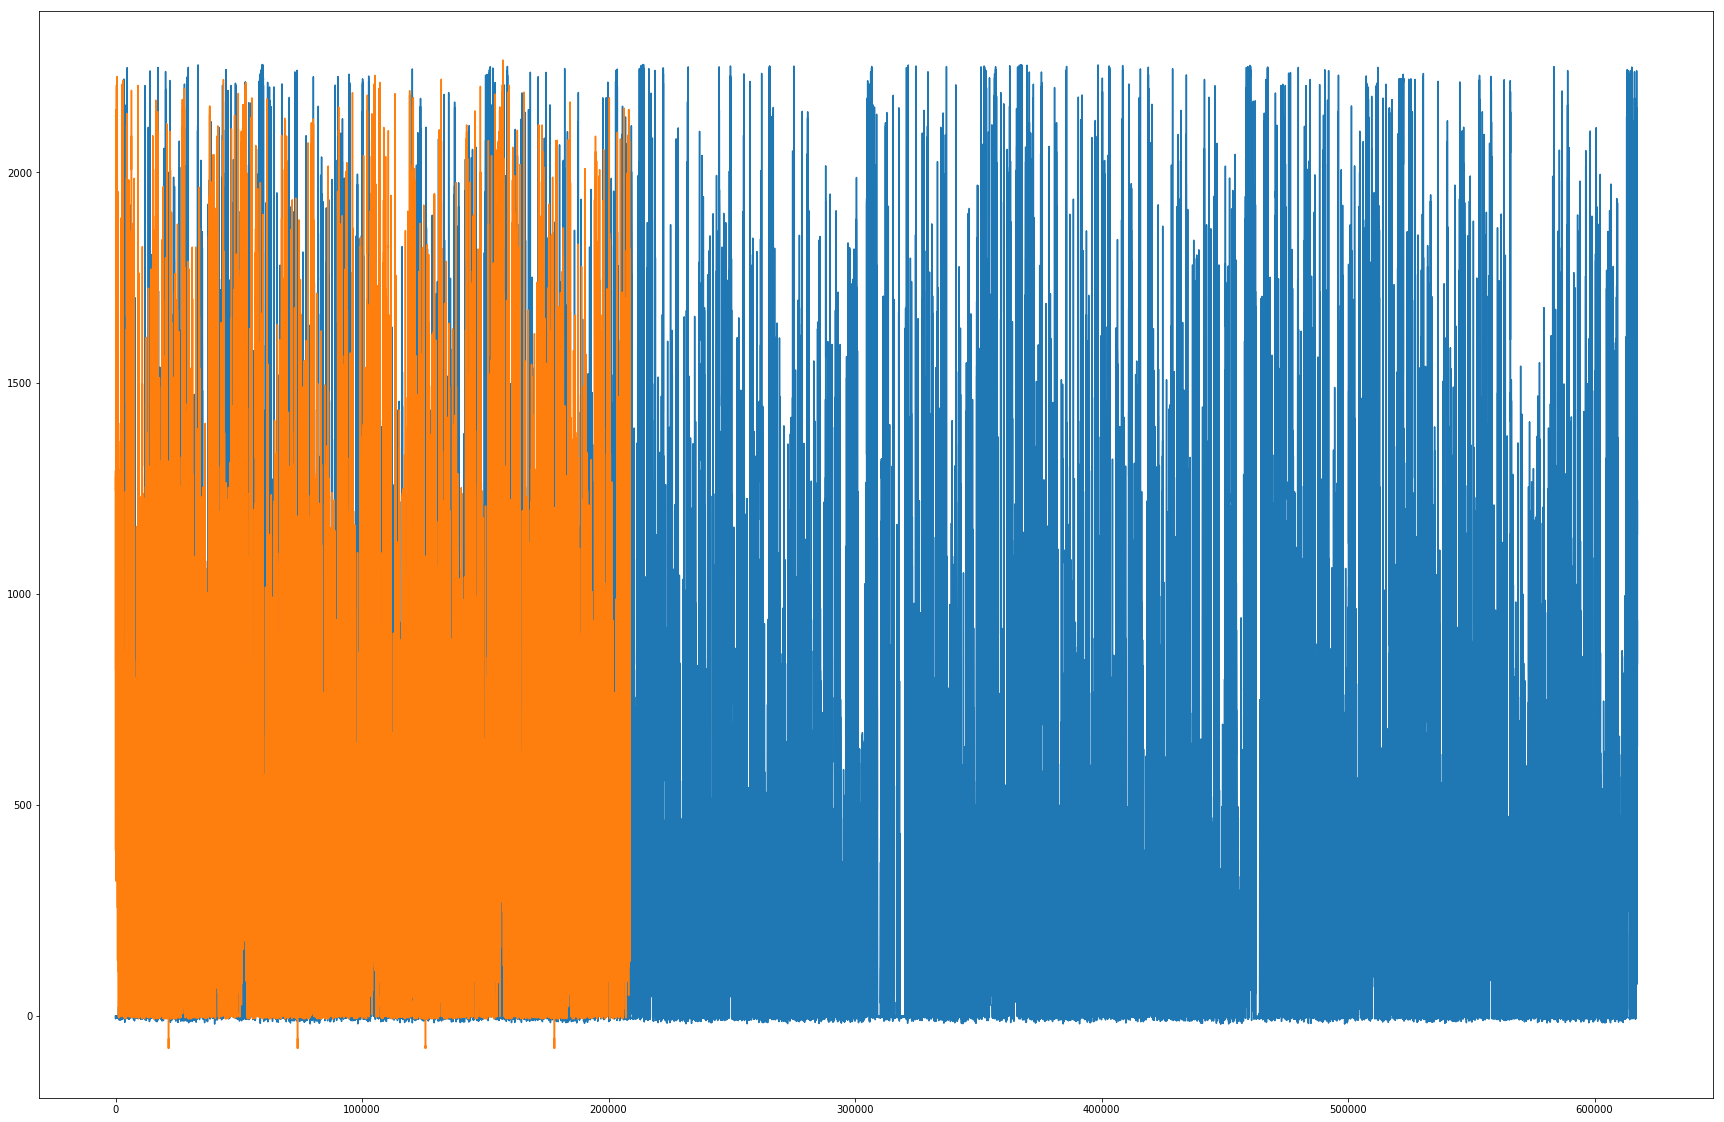

In [39]:
plt.rcParams['figure.figsize'] = [30, 20]
plt.plot(y_train)
plt.plot(y_test)